# BERTopic

Topic modeling with BERTopic.

> We present BERTopic, a topic model that extends this process by extracting coherent topic representation through the development of a class-based variation of TF-IDF. More specifically, BERTopic generates document embedding with pre-trained transformer-based language models, clusters these embeddings, and finally, generates topic representations with the class-based TF-IDF procedure. BERTopic generates coherent topics and remains competitive across a variety of benchmarks involving classical models and those that follow the more recent clustering approach of topic modeling.

Grootendorst, M. (2022). BERTopic: Neural topic modeling with a class-based TF-IDF procedure. arXiv preprint arXiv:2203.05794. https://doi.org/10.48550/arXiv.2203.05794

## Install

In [1]:
### install bertopic
try:
  from bertopic import BERTopic
except:
  ### for colab, the `%pip` is a "magic command"
  ### regular `pip` throws errors and
  ### essentially `%pip` is less error-prone than `!pip`
  %pip install bertopic
  from bertopic import BERTopic

from bertopic.representation import PartOfSpeech, KeyBERTInspired
from umap import UMAP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [2]:
### import utilities
import pandas as pd
import numpy as np

In [3]:
### mount your google drive to read/write files on it
### popup should come up as this chunk runs
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Data

Example using the Dreaddit dataset.

> We present Dreaddit, a new text corpus of lengthy multi-domain social mediadata for the identification of stress. Our dataset consists of 190K posts from five different categories of Reddit communities.

Authors selected ten subreddits and categorized them into five domains: **abuse** (/r/domesticviolence, /r/survivorsofabuse), **anxiety** (/r/anxiety, /r/stress), **financial** (/r/almosthomeless, /r/assistance, /r/food_pantry, /r/homeless), **PTSD** (/r/ptsd), and **social** (/r/relationships).

Turcan, E., & McKeown, K. (2019). Dreaddit: A reddit dataset for stress analysis in social media. arXiv preprint arXiv:1911.00133. https://doi.org/10.48550/arXiv.1911.00133

In [ ]:
### edit the filepath to match your own
### 'MyDrive' is the root of your Google Drive
### can inspect the Files tab along the left side of this page
df_raw = pd.read_csv('/content/gdrive/MyDrive/Code/topic_model_workshop/dreaddit-train.csv')

### read out first and last few rows of dataframe
df_raw

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [7]:
### read out basic info about dataframe
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 116 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    subreddit                 object 
 1    post_id                   object 
 2    sentence_range            object 
 3    text                      object 
 4    id                        int64  
 5    label                     int64  
 6    confidence                float64
 7    social_timestamp          int64  
 8    social_karma              int64  
 9    syntax_ari                float64
 10   lex_liwc_WC               int64  
 11   lex_liwc_Analytic         float64
 12   lex_liwc_Clout            float64
 13   lex_liwc_Authentic        float64
 14   lex_liwc_Tone             float64
 15   lex_liwc_WPS              float64
 16   lex_liwc_Sixltr           float64
 17   lex_liwc_Dic              float64
 18   lex_liwc_function         float64
 19   lex_liwc_pronoun          float64
 20   lex_li

In [8]:
### extract 'text' variable (BERTopic requires a list as input)
docs = df_raw['text'].tolist()

print("Number of Documents: ", len(docs))

Number of Documents:  2838


In [9]:
### extract 'subreddit' variable (BERTopic requires a list as input)
classes = df_raw['subreddit'].tolist()

print("Number of Unique Subreddits: ", len(list(set(classes))))
print("List of Unique Subreddits: ", list(set(classes)))

Number of Unique Subreddits:  10
List of Unique Subreddits:  ['assistance', 'ptsd', 'anxiety', 'survivorsofabuse', 'homeless', 'almosthomeless', 'food_pantry', 'domesticviolence', 'relationships', 'stress']


According to the developer of BERTopic:

> **Should I preprocess the data?**
>
> No. By using document embeddings there is typically no need to preprocess the data as all parts of a document are important in understanding the general topic of the document. Although this holds in 99% of cases, if you have data that contains a lot of noise, for example, HTML-tags, then it would be best to remove them. HTML-tags typically do not contribute to the meaning of a document and should therefore be removed. However, if you apply topic modeling to HTML-code to extract topics of code, then it becomes important.

https://maartengr.github.io/BERTopic/faq.html#should-i-preprocess-the-data


## Run Model

In [10]:
### set a random state (seed) for UMAP, which is used in BERTopic
### UMAP is stochastic, will produce different results every time you call it
### all other settings need to be explicitly assigned or it breaks BERTopic
### here, just assigning the defaults that BERTopic already assigns if blank
### on parameters: https://umap-learn.readthedocs.io/en/latest/parameters.html
umap = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    low_memory=False,
    random_state = 111224
    )

### read out UMAP settings for posterity
print(umap)

UMAP(low_memory=False, metric='cosine', min_dist=0.0, n_components=5, random_state=111224)


In [11]:
### main method for extracting representative tokens of a topic
### selecting PartOfSpeech model (uses spaCy as a dependency)
### filters representative tokens of topics (but not how topics are constructed)
### defaults are `ADJ NOUN`, `NOUN`, and `ADJ`,
### i.e., representative terms of topics will only include adjectives, nouns,
### and combinations thereof
main_representation = PartOfSpeech("en_core_web_sm")

### can add additional methods for extracting representative tokens
### here, selecting keybert-inspired as one of the more baseline options
KeyBERT_model = KeyBERTInspired()

### add all models together to be run in a single `fit`
representation_model = {
   "Main": main_representation,
   "KeyBERT": KeyBERT_model,
}

topic_model = BERTopic(
    calculate_probabilities=True,
    n_gram_range=(1, 2),
    embedding_model="all-MiniLM-L6-v2",
    representation_model=representation_model,
    umap_model=umap,
    )

### read out bertopic settings for posterity
print(topic_model)

BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=all-MiniLM-L6-v2, hdbscan_model=HDBSCAN(...), language=None, low_memory=False, min_topic_size=10, n_gram_range=(1, 2), nr_topics=None, representation_model={'Main': PartOfSpeech(...), seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=False, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)


In [12]:
### fit model
topics, probs = topic_model.fit_transform(docs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Inspect Model

In [ ]:
### read out info on each topic
### note that -1 is "outlier" or the absence of a coherent topic
df_topic_info = topic_model.get_topic_info()

### export as csv
df_topic_info.to_csv('/content/gdrive/MyDrive/Code/topic_model_workshop/output/bertopic_topic_info.csv')

df_topic_info

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,1537,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...
1,0,212,0_anxiety_time_panic_day,"[anxiety, time, panic, day, attacks, work, peo...","[anxiety, my anxiety, anxious, panic attacks, ...",[I described my symptoms to friends and they w...
2,1,156,1_relationship_like_other_things,"[relationship, like, other, things, time, girl...","[with her, relationship, she would, she is, he...",[They're all things I enjoy doing and don't se...
3,2,109,2_door_back_room_while,"[door, back, room, while, night, time, hospita...","[abuse, the police, the door, kicked, door, hi...",[Since over the summer he has became homeless ...
4,3,86,3_ptsd_years_symptoms_people,"[ptsd, years, symptoms, people, trauma, trauma...","[have ptsd, ptsd, ptsd from, with ptsd, therap...","[I'm not asking for a diagnosis, but I'm just ..."
5,4,77,4_things_time_day_other,"[things, time, day, other, life, angry, way, l...","[to him, his, he is, him, angry, from him, him...",[He explained that he didn’t think it was such...
6,5,73,5_other_months_relationship_time,"[other, months, relationship, time, guy, break...","[relationship, dating, boyfriend, with him, he...","[I’m also quite intellectual, I can speak 2 la..."
7,6,45,6_support_mental_mental health_people,"[support, mental, mental health, people, healt...","[mental health, peer support, experiences, sto...",[Can you contribute your story alongside other...
8,7,44,7_about_call_boss_work,"[about, call, boss, work, phone, email, store,...","[boss, hung up, call, my boss, emergency, mana...","[I think about it very often, wondering if I s..."
9,8,43,8_food_items_help_store,"[food, items, help, store, amazon, bank, pantr...","[supermarkets, pantry, food in, food, the food...",[-In not giving financial advice. -I'm not doi...


In [14]:
### for a given topic, read out top tokens associated with that topic
topic_model.get_topic(0)

[('anxiety', 0.01839378965370135),
 ('time', 0.0070648306876462666),
 ('panic', 0.005842458369577596),
 ('day', 0.005214649033574034),
 ('attacks', 0.004698379584247177),
 ('work', 0.004675778017485599),
 ('people', 0.004225539071149063),
 ('things', 0.004219032309953182),
 ('fear', 0.00394990255256082),
 ('heart', 0.003940232787952256)]

In [16]:
### read out topic classification, representative terms, and
### probability of topic assignment
topic_model.get_document_info(docs)


,Document,Topic,Name,Representation,KeyBERT,Representative_Docs,Top_n_words,Probability,Representative_document
0,"He said he had not felt that way before, sugge...",-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.214900,False
1,"Hey there r/assistance, Not sure if this is th...",11,11_survey_consent_form_research,"[survey, consent, form, research, study, respo...","[surveys, the survey, consent form, survey the...",[Your responses to the survey items will be an...,survey - consent - form - research - study - r...,1.000000,False
2,My mom then hit me with the newspaper and it s...,-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.229688,False
3,"until i met my new boyfriend, he is amazing, h...",-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.237894,False
4,October is Domestic Violence Awareness Month a...,2,2_door_back_room_while,"[door, back, room, while, night, time, hospita...","[abuse, the police, the door, kicked, door, hi...",[Since over the summer he has became homeless ...,door - back - room - while - night - time - ho...,0.157525,False
...,...,...,...,...,...,...,...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",1,1_relationship_like_other_things,"[relationship, like, other, things, time, girl...","[with her, relationship, she would, she is, he...",[They're all things I enjoy doing and don't se...,relationship - like - other - things - time - ...,0.405533,False
2834,I don't have the ability to cope with it anymo...,-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.205947,False
2835,In case this is the first time you're reading ...,6,6_support_mental_mental health_people,"[support, mental, mental health, people, healt...","[mental health, peer support, experiences, sto...",[Can you contribute your story alongside other...,support - mental - mental health - people - he...,0.299695,False
2836,Do you find this normal? They have a good rela...,-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.155510,False


In [20]:
### add info about the percentage of the document that relates to the topic
topic_distr, _ = topic_model.approximate_distribution(docs, batch_size=1000)
distributions = [distr[topic] if topic != -1 else 0 for topic, distr in zip(topics, topic_distr)]

### create document dataframe using the original dataframe and metadata about
### the topic distributions
df_doc_info = topic_model.get_document_info(
    docs,
    df=df_raw,
    metadata={"Topic_distribution": distributions}
    )

df_doc_info

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,Document,Topic,Name,Representation,KeyBERT,Representative_Docs,Top_n_words,Probability,Representative_document,Topic_distribution
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,"He said he had not felt that way before, sugge...",-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.214900,False,0.000000
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,"Hey there r/assistance, Not sure if this is th...",11,11_survey_consent_form_research,"[survey, consent, form, research, study, respo...","[surveys, the survey, consent form, survey the...",[Your responses to the survey items will be an...,survey - consent - form - research - study - r...,1.000000,False,0.473917
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,My mom then hit me with the newspaper and it s...,-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.229688,False,0.000000
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,"until i met my new boyfriend, he is amazing, h...",-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.237894,False,0.000000
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,October is Domestic Violence Awareness Month a...,2,2_door_back_room_while,"[door, back, room, while, night, time, hospita...","[abuse, the police, the door, kicked, door, hi...",[Since over the summer he has became homeless ...,door - back - room - while - night - time - ho...,0.157525,False,0.224195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,"* Her, a week ago: Precious, how are you? (I i...",1,1_relationship_like_other_things,"[relationship, like, other, things, time, girl...","[with her, relationship, she would, she is, he...",[They're all things I enjoy doing and don't se...,relationship - like - other - things - time - ...,0.405533,False,0.122760
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,I don't have the ability to cope with it anymo...,-1,-1_time_family_things_people,"[time, family, things, people, life, much, yea...","[family, feel, being, go, am, things, life, hi...",[It does not help that my mom leans on me and ...,time - family - things - people - life - much ...,0.205947,False,0.000000
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,In case this is the first time you're reading ...,6,6_support_mental_mental health_people,"[support, mental, mental health, people, healt...","[mental health, peer support, experiences, sto...",[Can you contribute your story alongside other...,support - mental - mental health - people - he...,0.299695,False,0.838701
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,Do you find this normal? They have a good rela...,-1,-1_time_

In [21]:
### read out basic info about dataframe
df_doc_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 126 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    subreddit                 object 
 1    post_id                   object 
 2    sentence_range            object 
 3    text                      object 
 4    id                        int64  
 5    label                     int64  
 6    confidence                float64
 7    social_timestamp          int64  
 8    social_karma              int64  
 9    syntax_ari                float64
 10   lex_liwc_WC               int64  
 11   lex_liwc_Analytic         float64
 12   lex_liwc_Clout            float64
 13   lex_liwc_Authentic        float64
 14   lex_liwc_Tone             float64
 15   lex_liwc_WPS              float64
 16   lex_liwc_Sixltr           float64
 17   lex_liwc_Dic              float64
 18   lex_liwc_function         float64
 19   lex_liwc_pronoun          float64
 20   lex_li

In [ ]:
### convert probs 2D array to dataframe
df_topic_probs = pd.DataFrame(probs)

df_topic_probs = df_topic_probs.add_prefix("topic_")
df_topic_probs = df_topic_probs.add_suffix("_prob")

### export as csv
df_topic_probs.to_csv('/content/gdrive/MyDrive/Code/topic_model_workshop/output/bertopic_probs.csv')

df_topic_probs

,topic_0_prob,topic_1_prob,topic_2_prob,topic_3_prob,topic_4_prob,topic_5_prob,topic_6_prob,topic_7_prob,topic_8_prob,topic_9_prob,...,topic_22_prob,topic_23_prob,topic_24_prob,topic_25_prob,topic_26_prob,topic_27_prob,topic_28_prob,topic_29_prob,topic_30_prob,topic_31_prob
0,4.188644e-02,1.306593e-02,2.586974e-02,9.265910e-02,1.629635e-02,1.403312e-02,3.150579e-02,1.946644e-02,1.230453e-02,2.564433e-02,...,1.443623e-02,1.336352e-02,2.972413e-02,2.332446e-02,1.377780e-02,5.681036e-02,1.393182e-02,4.489159e-02,1.060345e-02,1.275784e-02
1,3.184976e-308,2.607531e-308,2.831648e-308,2.813045e-308,2.349687e-308,2.185105e-308,4.418843e-308,3.563346e-308,1.082413e-307,2.540225e-308,...,2.838200e-308,4.908467e-308,4.722680e-308,2.645049e-308,2.478593e-308,3.303867e-308,2.198595e-308,3.538326e-308,2.701070e-307,6.188838e-308
2,1.318880e-02,1.814418e-02,1.529249e-01,1.481544e-02,2.937567e-02,2.052623e-02,1.566272e-02,2.544557e-02,1.020259e-02,9.093738e-03,...,2.377497e-02,1.438049e-02,1.885117e-02,4.564409e-02,2.592674e-02,1.771691e-02,1.743882e-02,1.577941e-02,8.328895e-03,1.113741e-02
3,1.547220e-02,2.397194e-02,3.692213e-02,1.522746e-02,7.613590e-02,6.480770e-02,1.431108e-02,2.003925e-02,1.139788e-02,1.064660e-02,...,3.233602e-02,1.554437e-02,1.693133e-02,3.170082e-02,3.281379e-02,1.996395e-02,7.157673e-02,1.484087e-02,9.008869e-03,1.296170e-02
4,1.549286e-02,2.240937e-02,1.575250e-01,1.883414e-02,5.239305e-02,3.057545e-02,1.850101e-02,2.398876e-02,1.231050e-02,1.132197e-02,...,3.080531e-02,1.708424e-02,2.136786e-02,7.375848e-02,3.491896e-02,2.003828e-02,2.542863e-02,1.886556e-02,1.045625e-02,1.325638e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,1.154692e-02,4.055333e-01,1.975087e-02,1.053983e-02,2.113040e-02,2.591817e-02,1.091510e-02,2.276768e-02,1.014021e-02,8.285565e-03,...,4.902373e-02,1.720111e-02,1.283153e-02,1.768463e-02,6.043209e-02,1.417973e-02,2.315260e-02,1.086406e-02,7.788307e-03,1.190806e-02
2834,4.144384e-02,9.150763e-03,1.453105e-02,3.422029e-02,9.935392e-03,8.946380e-03,2.288331e-02,1.409856e-02,8.910828e-03,1.786877e-02,...,9.823800e-03,9.862434e-03,2.435183e-02,1.373251e-02,8.928769e-03,3.072038e-01,9.108796e-03,2.825319e-02,7.281063e-03,9.476359e-03
2835,2.044565e-02,9.645776e-03,1.595917e-02,2.448297e-02,1.037128e-02,8.943097e-03,2.996952e-01,1.591244e-02,1.308011e-02,1.424576e-02,...,1.083122e-02,1.331475e-02,7.819778e-02,1.474337e-02,9.691576e-03,2.570185e-02,8.909256e-03,5.947851e-02,1.190561e-02,1.266387e-02
2836,1.431483e-02,3.409531e-02,3.653977e-02,1.427767e-02,2.360143e-02,2.208990e-02,1.627314e-02,3.711263e-02,1.320385e-02,9.886387e-03,...,5.024056e-02,2.386644e-02,2.011172e-02,2.861376e-02,4.565800e-02,1.858515e-02,1.964212e-02,1.579858e-02,1.028776e-02,1.501112e-02


In [ ]:
### attach topic probs to doc_info dataframe
df = df_doc_info.join(df_topic_probs)

### export as csv
df.to_csv('/content/gdrive/MyDrive/Code/topic_model_workshop/output/bertopic_docs.csv')

df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,topic_22_prob,topic_23_prob,topic_24_prob,topic_25_prob,topic_26_prob,topic_27_prob,topic_28_prob,topic_29_prob,topic_30_prob,topic_31_prob
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.443623e-02,1.336352e-02,2.972413e-02,2.332446e-02,1.377780e-02,5.681036e-02,1.393182e-02,4.489159e-02,1.060345e-02,1.275784e-02
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,2.838200e-308,4.908467e-308,4.722680e-308,2.645049e-308,2.478593e-308,3.303867e-308,2.198595e-308,3.538326e-308,2.701070e-307,6.188838e-308
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,2.377497e-02,1.438049e-02,1.885117e-02,4.564409e-02,2.592674e-02,1.771691e-02,1.743882e-02,1.577941e-02,8.328895e-03,1.113741e-02
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,3.233602e-02,1.554437e-02,1.693133e-02,3.170082e-02,3.281379e-02,1.996395e-02,7.157673e-02,1.484087e-02,9.008869e-03,1.296170e-02
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,3.080531e-02,1.708424e-02,2.136786e-02,7.375848e-02,3.491896e-02,2.003828e-02,2.542863e-02,1.886556e-02,1.045625e-02,1.325638e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,4.902373e-02,1.720111e-02,1.283153e-02,1.768463e-02,6.043209e-02,1.417973e-02,2.315260e-02,1.086406e-02,7.788307e-03,1.190806e-02
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,9.823800e-03,9.862434e-03,2.435183e-02,1.373251e-02,8.928769e-03,3.072038e-01,9.108796e-03,2.825319e-02,7.281063e-03,9.476359e-03
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.083122e-02,1.331475e-02,7.819778e-02,1.474337e-02,9.691576e-03,2.570185e-02,8.909256e-03,5.947851e-02,1.190561e-02,1.266387e-02
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,5.024056e-02,2.386644e-02,2.011172e-02,2.861376e-02,4.565800e-02,1.858515e-02,1.964212e-02,1.579858e-02,1.028776e-02,1.501112e-02


## Visualize

In [ ]:
### plot intertopic distances
fig_vis_topics = topic_model.visualize_topics()
fig_vis_topics.write_html("/content/gdrive/MyDrive/Code/topic_model_workshop/output/figures/bertopic_vis_topics.html")

fig_vis_topics

In [ ]:
### plot topic word scores
fig_vis_bar = topic_model.visualize_barchart(top_n_topics=999)
fig_vis_bar.write_html("/content/gdrive/MyDrive/Code/topic_model_workshop/output/figures/bertopic_vis_bar.html")

fig_vis_bar

In [ ]:
### plot hierarchical clustering
fig_vis_hier = topic_model.visualize_hierarchy()
fig_vis_hier.write_html("/content/gdrive/MyDrive/Code/topic_model_workshop/output/figures/bertopic_vis_hier.html")

fig_vis_hier

In [ ]:
### plot heatmap
fig_vis_heat = topic_model.visualize_heatmap()
fig_vis_heat.write_html("/content/gdrive/MyDrive/Code/topic_model_workshop/output/figures/bertopic_vis_heat.html")

fig_vis_heat

In [37]:
### calculate topics per class (here, 'subreddit')
topics_per_class = topic_model.topics_per_class(docs, classes=classes)


In [ ]:
### plot topics per class
fig_vis_topics_per_class = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=999)
fig_vis_topics_per_class.write_html("/content/gdrive/MyDrive/Code/topic_model_workshop/output/figures/bertopic_vis_topics_per_class.html")
fig_vis_topics_per_class

## Inference

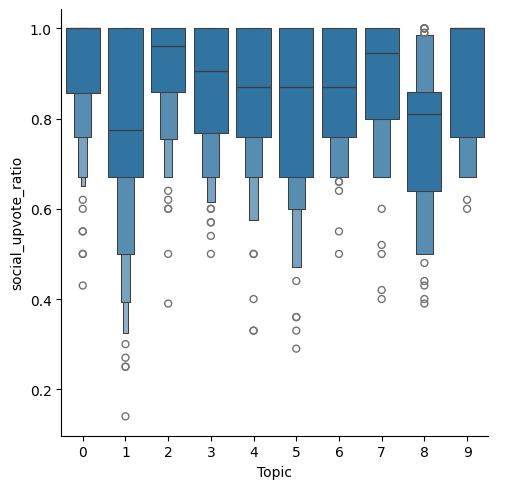

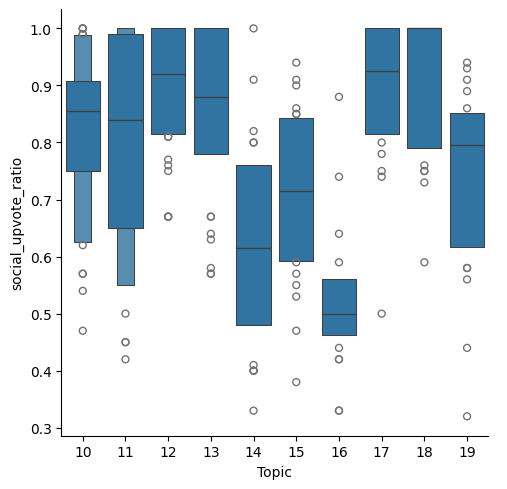

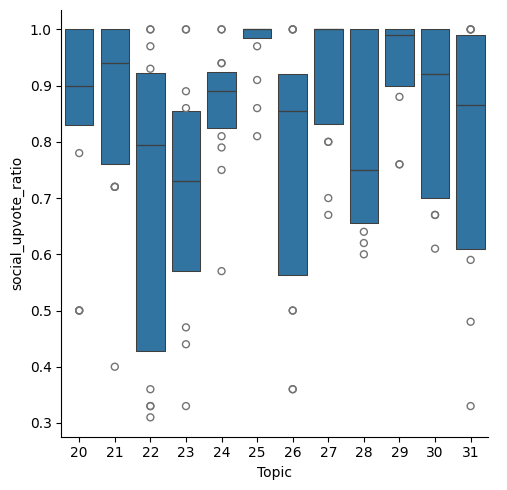

In [39]:
import seaborn as sns

sns.catplot(
    data=df[(df["Topic"] < 10) & (df["Topic"] > -1)],
    x="Topic", y="social_upvote_ratio", kind="boxen",
)

sns.catplot(
    data=df[(df["Topic"] < 20) & (df["Topic"] > 9)],
    x="Topic", y="social_upvote_ratio", kind="boxen",
)

sns.catplot(
    data=df[(df["Topic"] > 19)],
    x="Topic", y="social_upvote_ratio", kind="boxen",
)

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### run ANOVA
model = ols('social_upvote_ratio ~ C(Topic)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

### run Tukey posthocs
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeyhsd = pairwise_tukeyhsd(endog=df["social_upvote_ratio"], groups=df["Topic"])
print(tukeyhsd)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    -1      0   0.0755    0.0   0.029   0.122   True
    -1      1  -0.0699 0.0003 -0.1233 -0.0166   True
    -1      2   0.0636 0.0436  0.0007  0.1265   True
    -1      3   0.0178    1.0 -0.0525  0.0882  False
    -1      4  -0.0009    1.0 -0.0751  0.0732  False
    -1      5  -0.0326 0.9996 -0.1086  0.0435  False
    -1      6   0.0072    1.0 -0.0888  0.1032  False
    -1      7   0.0236    1.0 -0.0734  0.1207  False
    -1      8  -0.0833 0.2656 -0.1815  0.0148  False
    -1      9   0.0431 0.9996 -0.0573  0.1436  False
    -1     10  -0.0285    1.0 -0.1386  0.0816  False
    -1     11  -0.0595 0.9844 -0.1712  0.0522  False
    -1     12   0.0495 0.9997 -0.0675  0.1666  False
    -1     13   0.0149    1.0 -0.1041  0.1339  False
    -1     14  -0.2293    0.0 -0.3656  -0.093   True
    -1     15  -0.1416 0.0298 -0.2779 -0.0053 

## Save Model

In [ ]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save('/content/gdrive/MyDrive/Code/topic_model_workshop/output/bertopic_model/', serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

### load from directory
# topic_model = BERTopic.load('/content/gdrive/MyDrive/Code/topic_model_workshop/bertopic_model/')